In [1]:
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
if sys.version_info[0] < 3: 
    import StringIO
else:
    from io import StringIO


In [2]:
def getFilenames(dirname = "../data/N48 UD DM S3/"):
    filenames = []
    for file in os.listdir(dirname):
        if file.endswith(".txt"):
            filenames.append(os.path.join(dirname,file))
    return filenames

filenames = getFilenames()


In [3]:
frames = []
labels = ['test_num', 'location_num', 'mag_x', 'mag_y', 'mag_z', 'temp', 'weight','time']
test_num_offset = 0
for name in filenames:
    file = open(name,'r')
    data = file.readlines()
    data = data[2:]
    
    numfields = len(data[0].split(", "))
    if numfields == 6:
        labels = ['test_num', 'location_num', 'mag_x', 'mag_y', 'mag_z', 'temp','time']
    test = []
    lastnum = 0
    tests = []
    time = 0
    for datum in data:
        datum = datum.replace("[","")
        datum = datum.replace("]","")
        datum = datum.replace("\n","")
        datum = [float(field) for field in datum.split(", ")]
        testnum = datum[0]
        datum[0] = int(datum[0]) +test_num_offset
        time+=1
    
        if testnum != lastnum:
            tests.append(test)
            test = []
            lastnum = testnum
            time =0
        datum.append(time)

        test.append(tuple(datum))
    test_num_offset = testnum
    tests.append(test)
    for test in tests:
        frame = pd.DataFrame.from_records(test,columns=labels)
        frames.append(frame)
    

dataset = pd.concat(frames)
dataset.test_num = dataset.test_num.astype(int)

test_nums = np.unique(dataset['test_num'])
y = np.zeros(len(test_nums))
for num in test_nums:
    y[num] = dataset.query('test_num=={}'.format(num))['location_num'].iloc[0]


In [4]:
test

[(573.0, 24.0, 136.05, -139.5, 1770.47, 21.31, 40.7, 0),
 (573.0, 24.0, 147.6, -136.35, 1766.12, 21.24, 40.3, 1),
 (573.0, 24.0, 147.15, -142.65, 1770.71, 21.24, 41.1, 2),
 (573.0, 24.0, 144.15, -140.1, 1769.26, 21.17, 41.6, 3),
 (573.0, 24.0, 144.6, -141.15, 1770.23, 21.26, 42.0, 4),
 (573.0, 24.0, 143.7, -143.25, 1773.13, 21.24, 42.4, 5),
 (573.0, 24.0, 144.3, -138.6, 1772.41, 21.11, 42.7, 6),
 (573.0, 24.0, 147.0, -143.25, 1764.91, 21.17, 43.2, 7),
 (573.0, 24.0, 147.3, -143.25, 1769.75, 21.31, 43.5, 8),
 (573.0, 24.0, 149.7, -138.15, 1769.5, 21.28, 44.3, 9),
 (573.0, 24.0, 145.95, -142.5, 1766.36, 21.15, 44.9, 10),
 (573.0, 24.0, 145.95, -139.95, 1767.81, 21.24, 45.0, 11),
 (573.0, 24.0, 144.9, -138.3, 1770.23, 21.26, 45.7, 12),
 (573.0, 24.0, 143.85, -138.0, 1771.44, 21.28, 46.2, 13),
 (573.0, 24.0, 147.6, -141.3, 1767.81, 21.28, 46.4, 14),
 (573.0, 24.0, 144.45, -137.7, 1765.63, 21.11, 47.1, 15),
 (573.0, 24.0, 144.15, -139.8, 1770.23, 21.17, 47.3, 16),
 (573.0, 24.0, 146.25, -14

In [5]:
dat1000 = dataset.query('test_num==1000')
dat1000

,test_num,location_num,mag_x,mag_y,mag_z,temp,weight,time
0,1000,24.0,139.50,-124.65,1793.46,20.46,18.1,0
1,1000,24.0,140.70,-128.85,1800.00,20.27,18.3,1
2,1000,24.0,141.15,-129.30,1797.33,20.27,18.6,2
3,1000,24.0,139.05,-126.15,1789.35,20.29,18.9,3
4,1000,24.0,137.40,-127.80,1792.98,20.24,19.9,4
5,1000,24.0,141.90,-127.80,1795.88,20.40,19.6,5
6,1000,24.0,142.20,-125.25,1792.01,20.33,20.1,6
7,1000,24.0,138.60,-127.05,1797.58,20.15,20.3,7
8,1000,24.0,140.10,-127.50,1798.06,20.24,21.0,8
9,1000,24.0,141.15,-125.40,1794.19,20.55,21.2,9


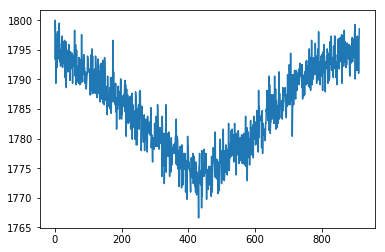

In [6]:
plt.plot(np.array(dat1000['time']),np.array(dat1000['mag_z']))

In [7]:
dataset=dataset.drop(columns = ['location_num','weight','temp'])
dataset

,test_num,mag_x,mag_y,mag_z,time
0,0,143.10,-133.95,1776.52,1
1,0,148.65,-135.75,1780.39,2
2,0,148.80,-139.05,1781.85,3
3,0,146.40,-137.40,1785.23,4
4,0,149.10,-140.40,1786.44,5
5,0,149.70,-139.50,1779.67,6
6,0,149.70,-136.20,1780.64,7
7,0,149.85,-138.15,1777.49,8
8,0,148.80,-136.20,1779.18,9
9,0,148.35,-135.75,1782.09,10


In [8]:
np.save('../data/y.npy',y)
np.save('../data/dataset.npy',np.array(dataset))

Now that dataset is created, let's extract some features!

In [9]:
import numpy as np
import pandas as pd
from tsfresh import extract_relevant_features
from tsfresh.feature_extraction import MinimalFCParameters


In [10]:
data=np.load('../data/dataset.npy')
labels = ['test_num', 'mag_x', 'mag_y', 'mag_z','time']
dataset = pd.DataFrame({ labels[0]:data[:,0].astype(int) , labels[1]:data[:,1] , labels[2]:data[:,2], \
labels[3]:data[:,3],labels[4]:data[:,4]})
y = np.load('../data/y.npy')
y = pd.Series(y.astype(int))


In [11]:
dataset

,test_num,mag_x,mag_y,mag_z,time
0,0,143.10,-133.95,1776.52,1.0
1,0,148.65,-135.75,1780.39,2.0
2,0,148.80,-139.05,1781.85,3.0
3,0,146.40,-137.40,1785.23,4.0
4,0,149.10,-140.40,1786.44,5.0
5,0,149.70,-139.50,1779.67,6.0
6,0,149.70,-136.20,1780.64,7.0
7,0,149.85,-138.15,1777.49,8.0
8,0,148.80,-136.20,1779.18,9.0
9,0,148.35,-135.75,1782.09,10.0


In [12]:

features =  extract_relevant_features(dataset, y, column_id='test_num', column_sort='time', default_fc_parameters=MinimalFCParameters())
features.to_pickle('../data/features.pkl')

Feature Extraction: 100%|██████████| 20/20 [00:00<00:00, 35.20it/s]


In [21]:
features.shape

(1274, 24)

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np


In [15]:
X = pd.read_pickle('../data/features.pkl')
y = np.load('../data/y.npy')
y = pd.Series(y.astype(int))
N = len(X)

rs = ShuffleSplit(n_splits=5, test_size=.25, random_state=8)
for tr,tst in rs.split(X):
    train_x = np.array(X)[tr]
    train_y = np.array(y)[tr]
    test_x = np.array(X)[tst]
    test_y = np.array(y)[tst]

In [16]:
def evalModel(model,train_x,train_y,test_x,test_y):
    y_hat = model.predict(test_x)
    print('Predicted classes: {0}'.format(np.unique(y_hat)))
    print('Training score: {0}'.format(model.score(train_x,train_y)))
    print('Test score: {0}'.format(model.score(test_x,test_y)))
    plt.matshow(confusion_matrix(test_y,y_hat))

Predicted classes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
Training score: 1.0
Test score: 0.5203761755485894


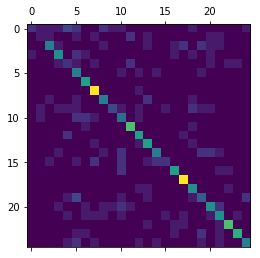

In [27]:
forest = RandomForestClassifier(n_estimators=100)
forest.fit(train_x,train_y)
evalModel(forest,train_x,train_y,test_x,test_y)

Predicted classes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
Training score: 1.0
Test score: 0.32601880877742945


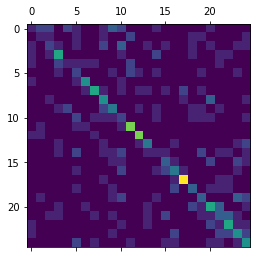

In [24]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(train_x,train_y)
evalModel(knn,train_x,train_y,test_x,test_y)


Predicted classes: [ 1  2  4  7  9 10 12 13 15 16 19 21 22]
Training score: 0.04502617801047121
Test score: 0.018808777429467086


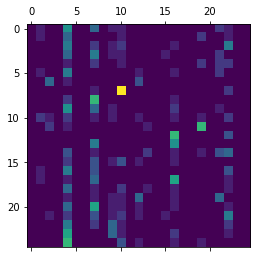

In [22]:
mlp = MLPClassifier(hidden_layer_sizes=(24,24),max_iter=int(1e10),random_state=8,tol=1e-10)
mlp.fit(train_x,train_y)
evalModel(mlp,train_x,train_y,test_x,test_y)


In [20]:
mlp

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(3, 3), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000000000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=8, shuffle=True, solver='adam', tol=1e-10,
       validation_fraction=0.1, verbose=False, warm_start=False)